# Rain Data Analysis

DATA Source: https://www.kaggle.com/datasets/gregoryoliveira/brazil-weather-information-by-inmet

In [ ]:
import pandas as pd
from get_files_only import get_file_from_xdrive
df_rain = get_file_from_xdrive('WeatherData.csv')


ValueError: All objects passed were None

## Data Cleansing

In [ ]:
df_rain_cleaned = df_rain[['DATA (YYYY-MM-DD)', 'Hora UTC', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'ESTACAO']]


,DATA (YYYY-MM-DD),Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",ESTACAO
0,2024-01-01,0000 UTC,0.0,A001
1,2024-01-01,0100 UTC,0.0,A001
2,2024-01-01,0200 UTC,0.0,A001
3,2024-01-01,0300 UTC,0.0,A001
4,2024-01-01,0400 UTC,0.0,A001


In [ ]:
stations = get_file_from_xdrive('stations.csv')

df_merged = pd.merge(df_rain_cleaned , stations, left_on='ESTACAO', right_on='id_station', how='left')
df_rain =df_merged.drop(columns=['lat', 'lon', 'city_station', 'state'])
#CO is Central East which in prices is in SE
df_rain['region'] = df_rain['region'].replace('CO', 'SE')
df_rain = df_rain.rename(
    columns = {'DATA (YYYY-MM-DD)':'DateValueUTC', 'Hora UTC': 'TimeValueUTC', 
               'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Rain', 
               'ESTACAO': 'Metering Station', 'region': 'Region'})
df_rain['Unit'] = 'mm'
df_rain['TimeValueUTC'] = df_rain['TimeValueUTC'].str[:2]


,DateValueUTC,TimeValueUTC,Rain,Metering Station,Region,id_station,lvl,record_first,record_last,Unit
0,2024-01-01,00,0.0,A001,SE,A001,"1159,54",2000-05-07,2024-08-31,mm
1,2024-01-01,01,0.0,A001,SE,A001,"1159,54",2000-05-07,2024-08-31,mm
2,2024-01-01,02,0.0,A001,SE,A001,"1159,54",2000-05-07,2024-08-31,mm
3,2024-01-01,03,0.0,A001,SE,A001,"1159,54",2000-05-07,2024-08-31,mm
4,2024-01-01,04,0.0,A001,SE,A001,"1159,54",2000-05-07,2024-08-31,mm


## EDA

In [ ]:
df_temp = df_rain[['DateValueUTC', 'TimeValueUTC', 'Region', 'Rain', 'Unit']]
df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
df_temp['Month'] = df_temp['DateTime'].dt.month
df_temp['Region'] = df_temp['Region'].replace('CO', 'SE')
df_temp_grouped = df_temp.groupby(['DateTime', 'Region']).mean().reset_index()


C:\Users\veron\AppData\Local\Temp\ipykernel_29388\601363935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
C:\Users\veron\AppData\Local\Temp\ipykernel_29388\601363935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
C:\Users\veron\AppData\Local\Temp\ipykernel_29388\60

Rain                                                         \
               count      mean       std  min       25%       50%       75%   
Month Region                                                                  
1.0   N       2232.0  0.386119  0.407494  0.0  0.092247  0.256125  0.558405   
      NE      2232.0  0.170349  0.208739  0.0  0.022222  0.093976  0.245060   
      S       2232.0  0.196105  0.310696  0.0  0.005861  0.062192  0.253654   
      SE      2232.0  0.353605  0.306102  0.0  0.109594  0.275590  0.519228   
2.0   N       2040.0  0.405528  0.402334  0.0  0.103640  0.290616  0.575944   
      NE      2040.0  0.185788  0.263841  0.0  0.015789  0.085714  0.244687   
      S       2040.0  0.187303  0.308119  0.0  0.005146  0.047690  0.230799   
      SE      2040.0  0.276317  0.255810  0.0  0.079937  0.210946  0.392879   
3.0   N       2232.0  0.433542  0.425875  0.0  0.123387  0.307072  0.609250   
      NE      2232.0  0.238359  0.262120  0.0  0.050505  0.147826  0.340204   
      S       2232.0  0.210052  0.349883  0.0  0.007143  0.057143  0.275189   
      SE      2232.0  0.190418  0.213082  0.0  0.036666  0.117444  0.266075   
4.0   N       2160.0  0.342347  0.364881  0.0  0.070968  0.231250  0.504212   
      NE      2160.0  0.223718  0.248183  0.0  0.053911  0.138673  0.306573   
      S       2160.0  0.229360  0.375673  0.0  0.004706  0.044969  0.272960   
      SE      2160.0  0.124204  0.174360  0.0  0.009511  0.057673  0.172559   
5.0   N       2232.0  0.221442  0.285337  0.0  0.029167  0.117840  0.305974   
      NE      2232.0  0.137477  0.179081  0.0  0.029157  0.080000  0.175128   
      S       2232.0  0.272235  0.439647  0.0  0.004819  0.041096  0.385230   
      SE      2232.0  0.036503  0.076558  0.0  0.001026  0.006061  0.029911   
6.0   N       2160.0  0.120531  0.211060  0.0  0.003704  0.036364  0.148790   
      NE      2160.0  0.107114  0.129615  0.0  0.023529  0.067827  0.141818   
      S       2160.0  0.204177  0.392422  0.0  0.002439  0.010063  0.232727   
      SE      2160.0  0.023763  0.055713  0.0  0.000000  0.003061  0.014698   
7.0   N       2232.0  0.060906  0.117726  0.0  0.000000  0.008000  0.065142   
      NE      2232.0  0.074812  0.100669  0.0  0.012000  0.038776  0.093333   
      S       2232.0  0.161158  0.350262  0.0  0.002469  0.013559  0.129268   
      SE      2232.0  0.017238  0.038074  0.0  0.000000  0.002222  0.014660   
8.0   N       2232.0  0.050561  0.119613  0.0  0.000000  0.003333  0.032727   
      NE      2232.0  0.039884  0.055048  0.0  0.002597  0.021622  0.055422   
      S       2232.0  0.135490  0.283291  0.0  0.000000  0.009339  0.118487   
      SE      2232.0  0.041893  0.085327  0.0  0.000000  0.005000  0.038655   
9.0   N       1440.0  0.069326  0.147478  0.0  0.000000  0.004082  0.059338   
      NE      1440.0  0.028893  0.048015  0.0  0.001896  0.011060  0.037778   
      S       1440.0  0.282304  0.449848  0.0  0.008451  0.080775  0.356978   
      SE      1440.0  0.081088  0.136620  0.0  0.003883  0.024305  0.094700   
10.0  N       1488.0  0.135536  0.238738  0.0  0.000000  0.027586  0.160870   
      NE      1488.0  0.030678  0.078076  0.0  0.000000  0.004348  0.023762   
      S       1488.0  0.359016  0.599182  0.0  0.005694  0.074996  0.455963   
      SE      1488.0  0.169483  0.209416  0.0  0.024879  0.089602  0.233301   
11.0  N       1440.0  0.211254  0.314745  0.0  0.006780  0.083333  0.278689   
      NE      1440.0  0.138710  0.228574  0.0  0.003883  0.049187  0.160996   
      S       1440.0  0.270619  0.443605  0.0  0.004651  0.050287  0.351951   
      SE      1440.0  0.204776  0.226280  0.0  0.024092  0.125754  0.309378   
12.0  N       1488.0  0.300399  0.355032  0.0  0.045298  0.170106  0.424565   
      NE      1488.0  0.123110  0.201086  0.0  0.003801  0.036461  0.149722   
      S       1488.0  0.196094  0.312640  0.0  0.002326  0.031032  0.279884   
      SE      1488.0  0.276882  0.228430  0.0  0.085415  0.240370 

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import pytz

# Define the timezones
utc = pytz.utc
cet = pytz.timezone('Europe/Berlin')

df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueUTC']).astype(str) + ' ' + (df_temp['TimeValueUTC']).astype(str), format='%Y-%m-%d %H:%M:%S')
df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
# Convert the 'TimeValueUTC' column from UTC to CET
df_temp['TimeValueCET'] = df_temp['DateTime'].dt.tz_localize('UTC').dt.tz_convert(cet)

# Create a 'day_of_week' feature
df_temp['day_of_week'] = df_temp['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

# Cyclical encoding for hour
df_temp['hour_sin'] = np.sin(2 * np.pi * df_temp['DateTime'].dt.hour / 24)
df_temp['hour_cos'] = np.cos(2 * np.pi * df_temp['DateTime'].dt.hour / 24)

# Cyclical encoding for day of year
df_temp['day_of_year'] = df_temp['DateTime'].dt.dayofyear
df_temp['day_sin'] = np.sin(2 * np.pi * df_temp['day_of_year'] / 365)
df_temp['day_cos'] = np.cos(2 * np.pi * df_temp['day_of_year'] / 365)

# Optionally: binary feature for weekend
df_temp['is_weekend'] = df_temp['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df_temp['year'] = df_temp['DateTime'].dt.year

C:\Users\veron\AppData\Local\Temp\ipykernel_29388\1809323869.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='day_of_year', y='Rain', hue='Region', estimator='mean', ci=None)


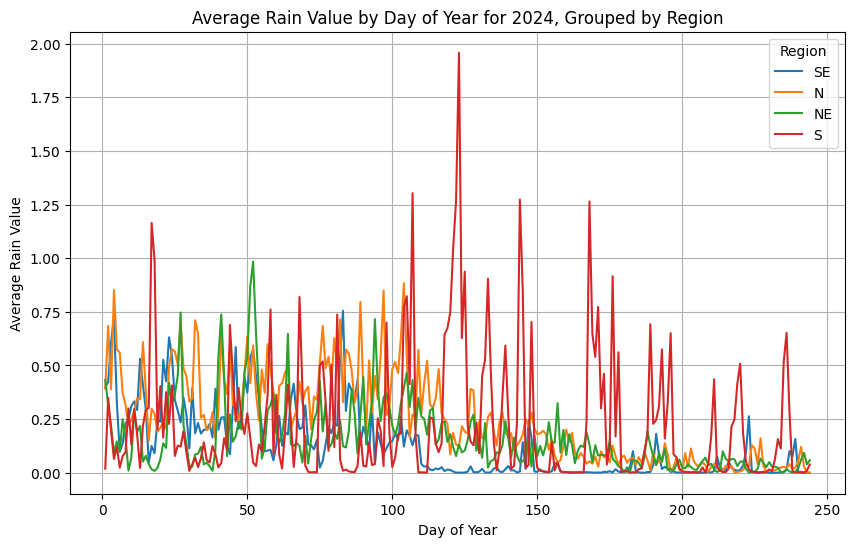

C:\Users\veron\AppData\Local\Temp\ipykernel_29388\1809323869.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='day_of_year', y='Rain', hue='Region', estimator='mean', ci=None)


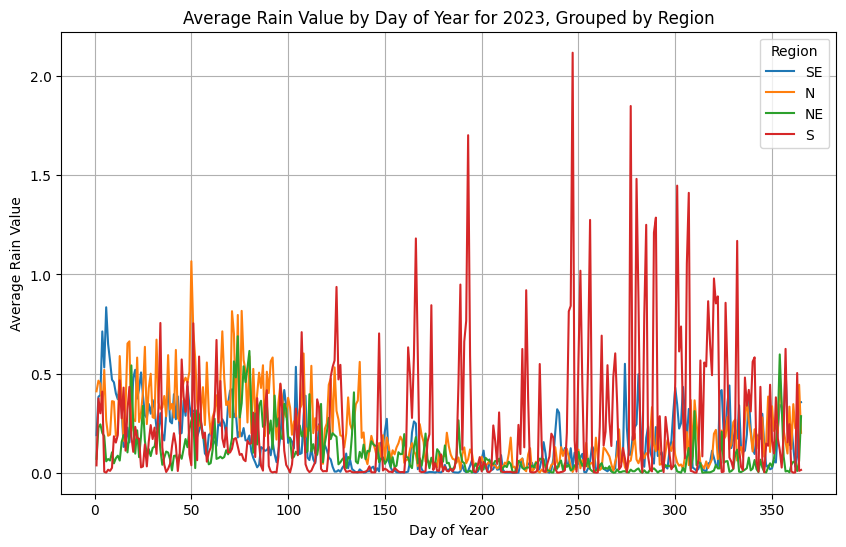

C:\Users\veron\AppData\Local\Temp\ipykernel_29388\1809323869.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='day_of_year', y='Rain', hue='Region', estimator='mean', ci=None)


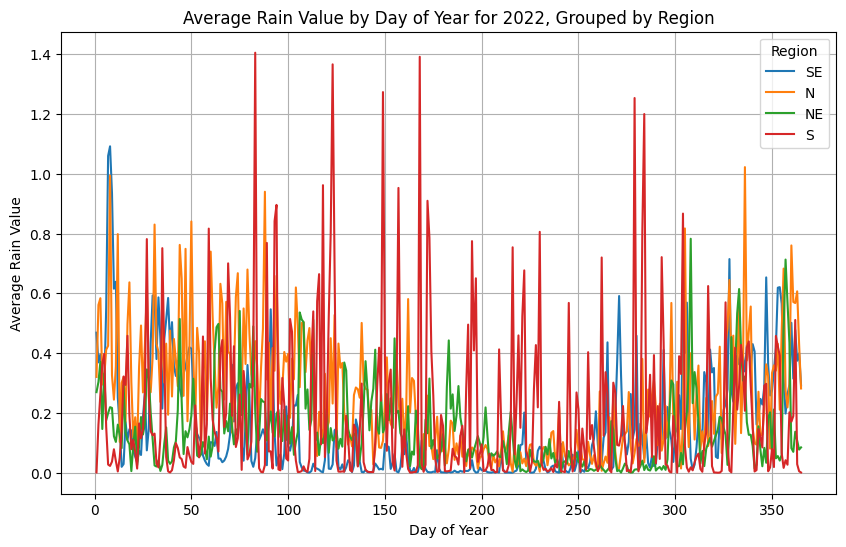

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df_temp has 'Rain', 'day_of_year', 'year', and 'region' columns

# Loop over the unique years and plot the average rain values for each year with region distinction
unique_years = df_temp['year'].unique()

for year in unique_years:
    # Filter the dataframe for the specific year
    df_year = df_temp[df_temp['year'] == year]
    
    # Create a plot for this year showing different regions on the same graph
    plt.figure(figsize=(10, 6))
    
    # Use seaborn's lineplot with 'hue' to differentiate regions
    sns.lineplot(data=df_year, x='day_of_year', y='Rain', hue='Region', estimator='mean', ci=None)
    
    # Customize the plot
    plt.title(f'Average Rain Value by Day of Year for {year}, Grouped by Region')
    plt.xlabel('Day of Year')
    plt.ylabel('Average Rain Value')
    plt.grid(True)
    
    # Show the plot
    plt.legend(title='Region')
    plt.show()


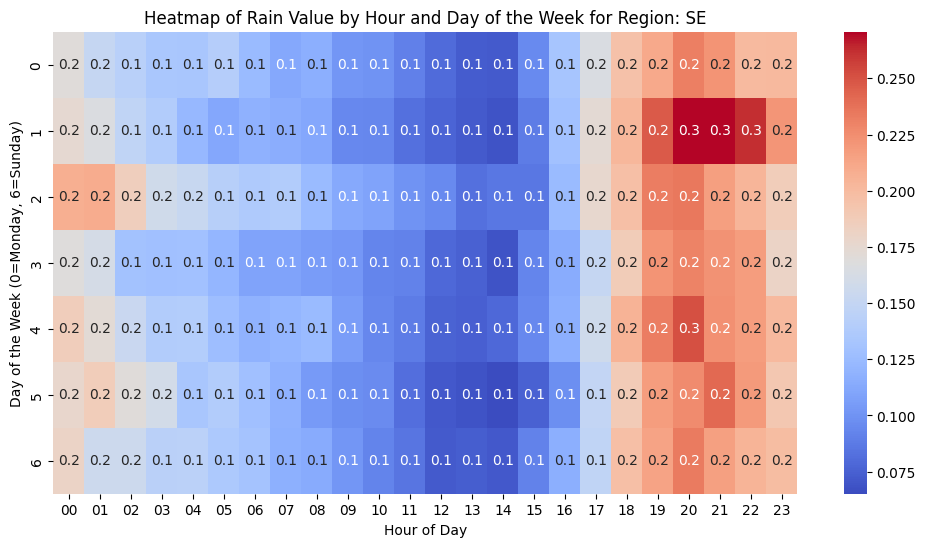

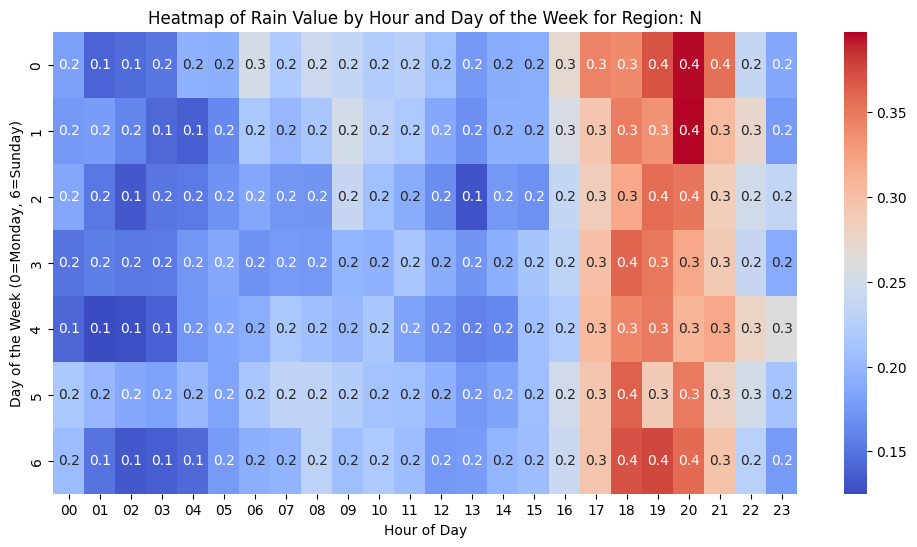

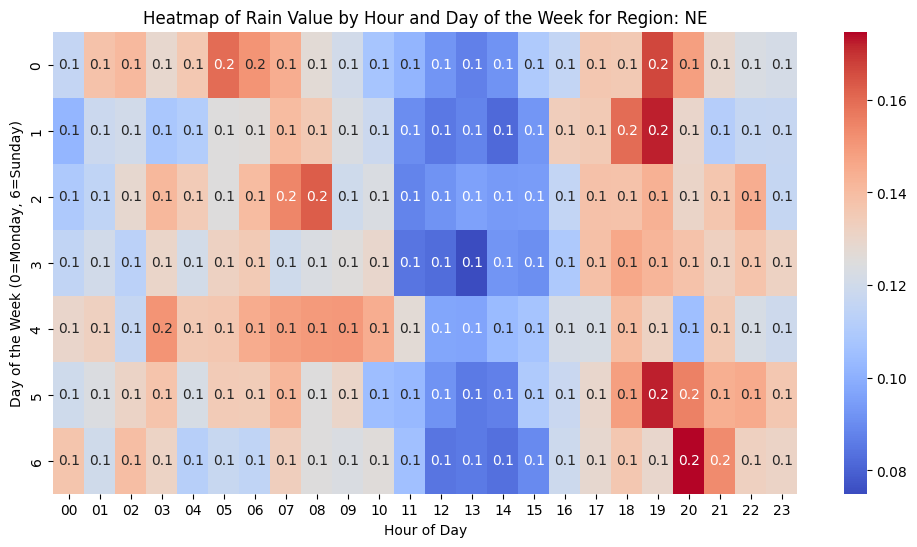

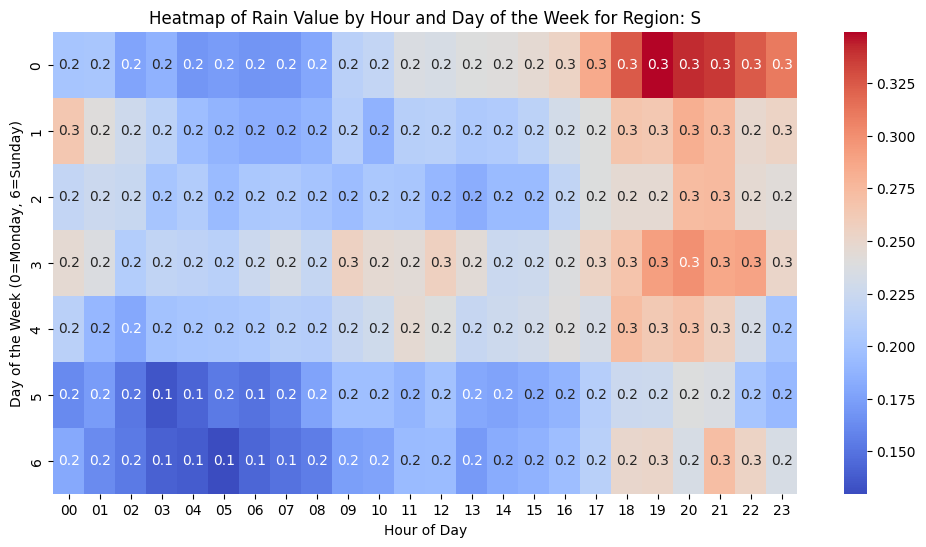

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_temp has 'Rain', 'day_of_week', 'TimeValueUTC', 'Hour', and 'region' columns

# Extract the 'Hour' if not already done
df_temp['Hour'] = df_temp['TimeValueUTC'].str[:2]

# Get unique regions
unique_regions = df_temp['Region'].unique()

for region in unique_regions:
    # Filter the dataframe for the specific region
    df_region = df_temp[df_temp['Region'] == region]
    
    # Pivot data to create a matrix for the heatmap
    heatmap_data = df_region.pivot_table(index='day_of_week', columns='Hour', values='Rain', aggfunc='mean')
    
    # Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
    plt.title(f'Heatmap of Rain Value by Hour and Day of the Week for Region: {region}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')
    plt.show()



In [ ]:
# Create a mapping dictionary for subsystem_id to PowerPriceAreaCode
mapping = {
    'N': 'BRAZIL_NORTH',
    'NE': 'BRAZIL_NORTHEAST',
    'S': 'BRAZIL_SOUTH',
    'SE': 'BRAZIL_SOUTHEAST_CENTRALWEST'
}

# Create a new column 'PowerPriceAreaCode' based on the mapping
df_temp['PowerPriceAreaCode'] = df_temp['Region'].map(mapping)

# Verify the result


,DateValueUTC,TimeValueUTC,Region,Rain,Unit,DateTime,Month,day_of_week,hour_sin,hour_cos,day_of_year,day_sin,day_cos,is_weekend,Hour,year,PowerPriceAreaCode
0,2024-01-01,00,SE,0.0,mm,2024-01-01 00:00:00,1,0,0.000000,1.000000,1,0.017213,0.999852,0,00,2024,BRAZIL_SOUTHEAST_CENTRALWEST
1,2024-01-01,01,SE,0.0,mm,2024-01-01 01:00:00,1,0,0.258819,0.965926,1,0.017213,0.999852,0,01,2024,BRAZIL_SOUTHEAST_CENTRALWEST
2,2024-01-01,02,SE,0.0,mm,2024-01-01 02:00:00,1,0,0.500000,0.866025,1,0.017213,0.999852,0,02,2024,BRAZIL_SOUTHEAST_CENTRALWEST
3,2024-01-01,03,SE,0.0,mm,2024-01-01 03:00:00,1,0,0.707107,0.707107,1,0.017213,0.999852,0,03,2024,BRAZIL_SOUTHEAST_CENTRALWEST
4,2024-01-01,04,SE,0.0,mm,2024-01-01 04:00:00,1,0,0.866025,0.500000,1,0.017213,0.999852,0,04,2024,BRAZIL_SOUTHEAST_CENTRALWEST
